In [1]:
import numpy as np
import time
from INST_6050A import INST_6050A

load = INST_6050A(22)
print ("Electronic Load: " + load.identify())

Electronic Load: HEWLETT-PACKARD,6050A,0,A.01.01



In [2]:
minI = 0
maxI = 1.8
stepI = 0.2

print("Load testing from {:0.4f}A to {:0.4f}A in {:0.4f}A steps...".format(minI, maxI, stepI))
print("")
print("I\tV")

load.set(1,"CC",0)
load.enable(1)
Vs = []
Is = []
for I in np.arange(minI, maxI+stepI, stepI):
    load.set(1,"CC",I)
    time.sleep(1)
    V = load.getVoltage(1)
    print("{:0.4f}\t{:0.4f}".format(I,V))
    Is.append(I)
    Vs.append(V)
load.disable(1)

Load testing from 0.0000A to 1.8000A in 0.2000A steps...

I	V
0.0000	10.0110
0.2000	9.9940
0.4000	9.9780
0.6000	9.9450
0.8000	9.9280
1.0000	9.9110
1.2000	9.8950
1.4000	9.8780
1.6000	9.8620
1.8000	9.8450


In [3]:
def linreg(x, y):
   meanx = np.mean(x)
   meany = np.mean(y)
   sumxx2 = np.sum((x - meanx) ** 2)
   sumxy = np.sum(((x - meanx) * (y - meany)))
   m = sumxy / sumxx2
   c = meany - m * meanx
   return np.array([m, c])

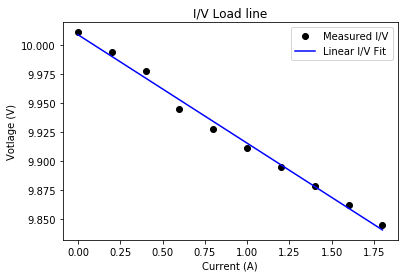

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
time.sleep(1)
fit = linreg(Is, Vs)
Vs_fit = []
for I in Is:
    Vs_fit.append(I*fit[0]+fit[1])
plt.plot(Is,Vs, 'o', color='black', label='Measured I/V')
plt.plot(Is,Vs_fit, '-', color='blue', label='Linear I/V Fit')
plt.legend()
plt.title('I/V Load line')
plt.xlabel('Current (A)')
plt.ylabel('Votlage (V)')
plt.show()

In [5]:
print("Output Impedance: {:0.3f} ohms".format(-fit[0]))

Output Impedance: 0.093 ohms
